# Chapter 1. 서울시 구별 CCTV 현황 분석

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
plt.rc('font',family='NanumGothic') ## 그래프 한글 표시

os.chdir("D:\OneDrive\Scripts\Python\Study\파이썬으로_데이터_주무르기")

## Load datasets
pop_Seoul = pd.read_csv(r'data\01_population_of_Seoul.csv')
CCTV_Seoul = pd.read_csv(r'data\01_CCTV_in_Seoul.csv')

In [147]:
CCTV_Seoul.head()

,기관명,소계,2013년도이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [148]:
# Calculate '최근증가율'
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도이전'] * 100

# Rename column
CCTV_Seoul.rename(columns = {'기관명':'구별'}, inplace=True)

# Drop the 1st column
pop_Seoul.drop([0], inplace=True)

# Calculate '외국인비율' and '고령자비율'
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

# Rename column
pop_Seoul.rename(columns = {'자치구':'구별'}, inplace=True)

In [149]:
# Merge two datasets
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,572140,567115,5025,61931,0.878282,10.824449
1,강동구,1010,379,99,155,377,166.490765,448471,444168,4303,53195,0.959482,11.861414
2,강북구,831,369,120,138,204,125.203252,330704,327195,3509,54053,1.061070,16.344828
3,강서구,911,388,258,184,81,134.793814,602104,595485,6619,71062,1.099312,11.802280
4,관악구,2109,846,260,390,613,149.290780,525607,506851,18756,66952,3.568446,12.738034


In [150]:
# Delete some columns
del data_result['2013년도이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,572140,567115,5025,61931,0.878282,10.824449
1,강동구,1010,166.490765,448471,444168,4303,53195,0.959482,11.861414
2,강북구,831,125.203252,330704,327195,3509,54053,1.061070,16.344828
3,강서구,911,134.793814,602104,595485,6619,71062,1.099312,11.802280
4,관악구,2109,149.290780,525607,506851,18756,66952,3.568446,12.738034


In [151]:
# 그래프 그릴 것을 생각하면 index가 구 이름이 되면 유리
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,572140,567115,5025,61931,0.878282,10.824449
강동구,1010,166.490765,448471,444168,4303,53195,0.959482,11.861414
강북구,831,125.203252,330704,327195,3509,54053,1.061070,16.344828
강서구,911,134.793814,602104,595485,6619,71062,1.099312,11.802280
관악구,2109,149.290780,525607,506851,18756,66952,3.568446,12.738034


In [152]:
## 상관계수
print("고령자비율과 CCTV수의 상관계수: {:.2f}".format(np.corrcoef(data_result['고령자비율'], data_result['소계'])[0, 1]))
print("외국인비율과 CCTV수의 상관계수: {:.2f}".format(np.corrcoef(data_result['외국인비율'], data_result['소계'])[0, 1]))
print("인구수와 CCTV수의 상관계수: {:.2f}".format(np.corrcoef(data_result['인구수'], data_result['소계'])[0, 1]))

고령자비율과 CCTV수의 상관계수: -0.26
외국인비율과 CCTV수의 상관계수: -0.05
인구수와 CCTV수의 상관계수: 0.25


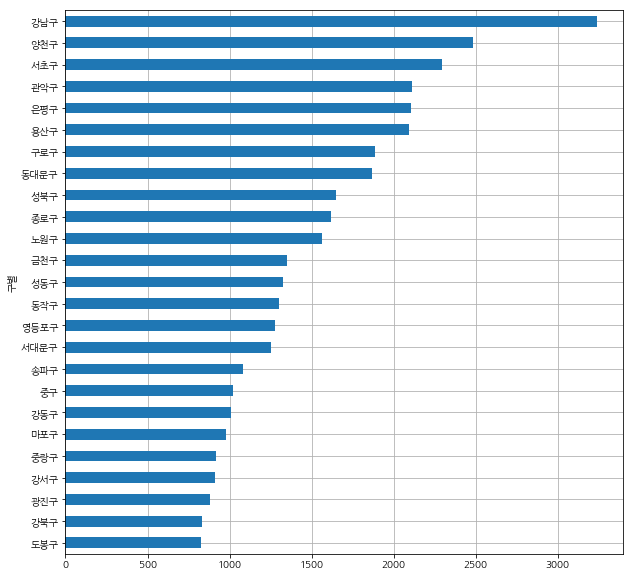

In [153]:
# plotting bar graph of the number of CCTV
data_result['소계'].sort_values().plot(kind='barh', grid = True, figsize = (10, 10))

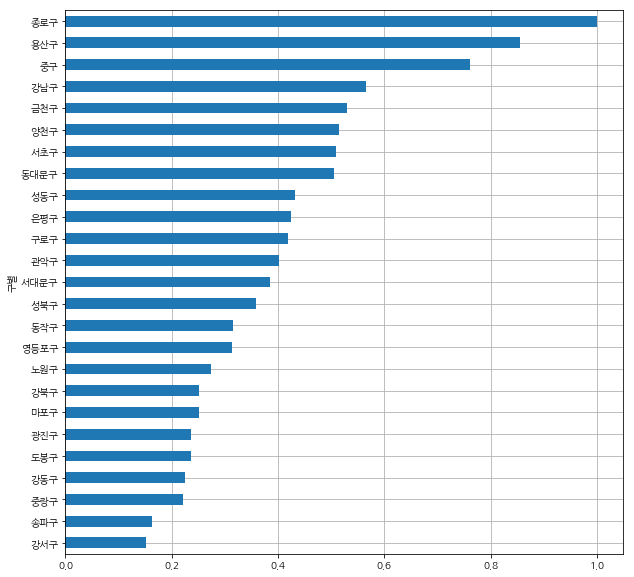

In [154]:
# Creating 'CCTV비율'
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

# Plotting 'CCTV비율'
data_result['CCTV비율'].sort_values().plot(kind='barh', grid = True, figsize = (10, 10))

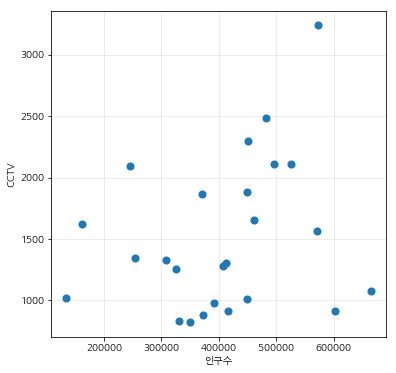

In [155]:
# Plotting scatter plot with '인구수' and 'CCTV수'
plt.figure(figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid(alpha = 0.3)
# Back to the element
plt.rcParams['axes.axisbelow'] = True

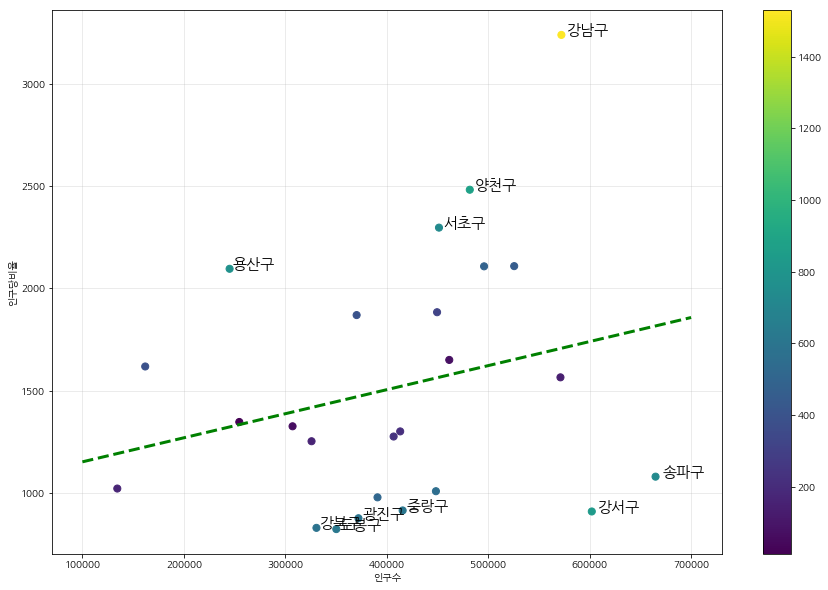

In [156]:
# Calculating regression line
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by = '오차', ascending = False)

# Plotting scatter plot and regression line
plt.figure(figsize = (15,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50, c = data_result['오차'])
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.01, df_sort['소계'][n]*1,
            df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid(alpha = 0.3)
# Back to the element
plt.rcParams['axes.axisbelow'] = True

In [159]:
data_result.to_csv(r'data\01_CCTV_result.csv', encoding = 'utf-8')